In [1]:
import numpy as np
from scipy import integrate
import math

In [2]:
import numpy as np, matplotlib.pyplot as plt

In [3]:
from tqdm import trange

In [4]:
T=100
L=3
mu=0
d = 2.34  
l = 2
s = 8.39e-2
d * (L * (1 - mu) / T) ** l / (s + (L * (1 - mu) / T) ** l)

0.024834905660377354

In [9]:
class environment():
    def __init__(self,a,ar_ratio):
        self.a=a
        self.ar=self.a*ar_ratio
        self.b = 3.846e-9
        
        self.alpha_sr=0.7
        self.alpha_rs=0.9
        
        
    def state_eq(self, t, x):
        Ts = x[0]
        Tr = x[1]

        T = Ts + Tr
        

        dts = max(self.a * Ts * (1 - self.b * (Ts + self.alpha_sr * Tr)) - 1, 0) 

        dtr = max(self.ar * Tr * (1 - self.b * (self.alpha_rs * Ts + Tr)) - 1, 0)
        
        return np.array([dts, dtr])
    
    def gen_state(self,t1):

        t0=0    # start and end
        interval=t1*24+1
        t = np.linspace(t0, t1,interval)  # the points of evaluation of solution
        x0 = [1e4,4e1]    # initial value
        x = np.zeros((len(t), len(x0)))   # array for solution
        x[0, :] = x0
        r = integrate.ode(self.state_eq).set_integrator("dopri5")
        r.set_initial_value(x0, t0)
        for i in range(1, t.size):
            x[i, :] = r.integrate(t[i])
        return t,x
    
def cal_time(x_,tumor):
    for i in range(len(x_.T[0])):
        if x_.T[0][i]+x_.T[1][i]>tumor:
            break
    return i


In [10]:
import pandas as pd
tcga_all=pd.read_csv('tcga_all.csv')

In [11]:
ar_ratio_l=[(1.3,1.4),(1.4,1.5),(1.5,1.6),(1.6,1.7),(1.7,1.8),(1.8,1.9),(1.9,2.0)]

In [12]:
res_prop_all=[]

for (l_,u_) in ar_ratio_l:
    print((l_,u_))
    res_prop=[]
    for i in trange(len(tcga_all)):
        tumor=tcga_all.loc[i,'tumor_size']
        a=tcga_all.loc[i,'a']
        ar_ratio=np.random.uniform(l_,u_)
        env=environment(a,ar_ratio)
        t1=600
        t,x=env.gen_state(t1)
        j=cal_time(x,tumor)
        res_prop.append(x[j][1]/tumor)
    res_prop_all.append(res_prop)

  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.3, 1.4)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.4, 1.5)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.5, 1.6)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.6, 1.7)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.7, 1.8)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.8, 1.9)


  0%|                                                   | 0/414 [00:00<?, ?it/s]

(1.9, 2.0)


100%|█████████████████████████████████████████| 414/414 [05:13<00:00,  1.32it/s]


In [13]:

res_prop=[]
for i in trange(len(tcga_all)):
    tumor=tcga_all.loc[i,'tumor_size']
    a=tcga_all.loc[i,'a']
    ar_ratio=np.random.uniform(1.3,1.8)
    env=environment(a,ar_ratio)
    t1=600
    t,x=env.gen_state(t1)
    j=cal_time(x,tumor)
    res_prop.append(x[j][1]/tumor)
res_prop_all.append(res_prop)

100%|█████████████████████████████████████████| 414/414 [02:43<00:00,  2.54it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


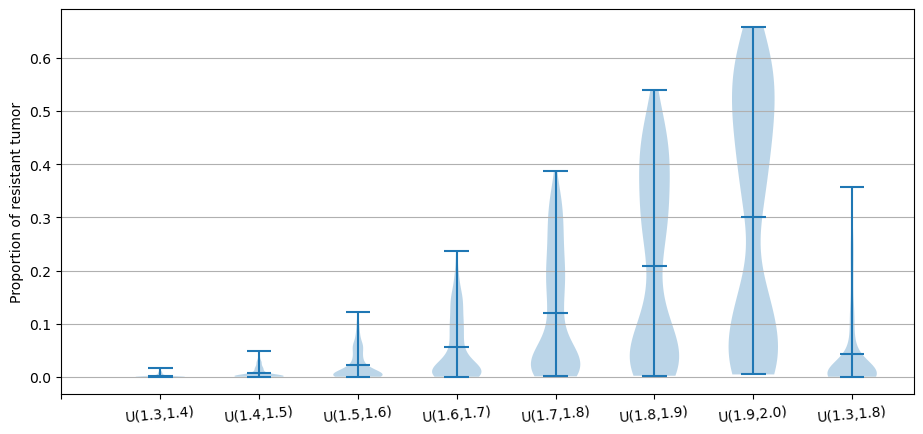

In [14]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 5))


# plot violin plot
ax.violinplot(res_prop_all,
                  showmeans=True,
                  showmedians=False)
ax.set_title('')

ax.yaxis.grid(True)
ax.xaxis.set_ticks(np.arange(9))
ax.set_xticklabels(['','U(1.3,1.4)','U(1.4,1.5)','U(1.5,1.6)','U(1.6,1.7)','U(1.7,1.8)','U(1.8,1.9)','U(1.9,2.0)','U(1.3,1.8)'],rotation = 5)
# ax.set_xlabel('Agent')
ax.set_ylabel('Proportion of resistant tumor')
plt.savefig("/Users/yaoyao/Desktop/research/cancer/ICC_decision_new/prop_resistant.eps", format='eps', dpi=1000)
# plt.show()